In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
np.random.seed(101) 
tf.set_random_seed(101)

In [5]:
x = np.linspace(0, 50, 50)
x += np.random.uniform(-4, 4, 50)

In [6]:
y = np.linspace(0,50,50)
y += np.random.uniform(-4, 4, 50)

In [7]:
n = len(x)

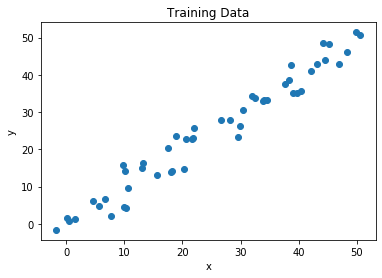

In [8]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [9]:
X= tf.placeholder("float")
Y= tf.placeholder("float")
W= tf.Variable(np.random.randn(), name = "w")
b= tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01
training_epochs = 1000

y_pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess: 
    sess.run(init)  
    for epoch in range(training_epochs):  
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})  
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))  
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W 

In [11]:
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



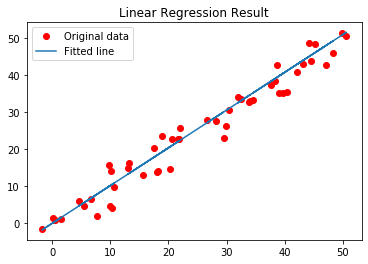

In [12]:
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show()